**复习：**在前面我们已经学习了Pandas基础，第二章我们开始进入数据分析的业务部分，在第二章第一节的内容中，我们学习了**数据的清洗**，这一部分十分重要，只有数据变得相对干净，我们之后对数据的分析才可以更有力。而这一节，我们要做的是数据重构，数据重构依旧属于数据理解（准备）的范围。

#### 开始之前，导入numpy、pandas包和数据

In [1]:
# 导入基本库
import pandas as pd
import numpy as np

In [2]:
# 载入上一个任务人保存的文件中:result.csv，并查看这个文件
data=pd.read_csv("result.csv")

# 2 第二章：数据重构


## 第一部分：数据聚合与运算

### 2.6 数据运用

#### 2.6.1 任务一：通过教材《Python for Data Analysis》P303、Google or anything来学习了解GroupBy机制

#写入心得
GroupBy对分组内容，统计对应其他列数据
groupby(),括号里可以是一列的表头或者多列的表头
函数后面，一般可以直接加统计函数，或者agg,transform,apply

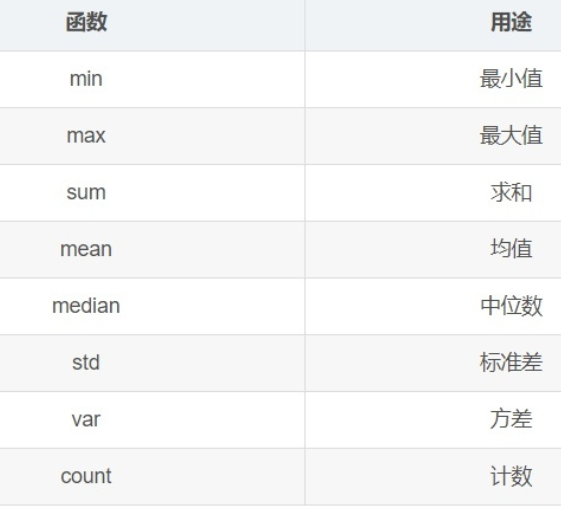

In [4]:
data

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,447,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,448,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,449,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,450,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### 2.4.2：任务二：计算泰坦尼克号男性与女性的平均票价

In [7]:
# 写入代码
data.Fare.groupby(data.Sex).mean()

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64

在了解GroupBy机制之后，运用这个机制完成一系列的操作，来达到我们的目的。

下面通过几个任务来熟悉GroupBy机制。

#### 2.4.3：任务三：统计泰坦尼克号中男女的存活人数

In [8]:
# 写入代码
data.Survived.groupby(data.Sex).sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [11]:
data.Survived.groupby(data.Sex).count()

Sex
female    314
male      577
Name: Survived, dtype: int64

#### 2.4.4：任务四：计算客舱不同等级的存活人数

In [9]:
# 写入代码
data.Survived.groupby(data.Pclass).sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [10]:
data.Survived.groupby(data.Pclass).count()

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

【**提示：**】表中的存活那一栏，可以发现如果还活着记为1，死亡记为0

【**思考**】从数据分析的角度，上面的统计结果可以得出那些结论

#思考心得 
女性平均年龄44，男性25;女性存活率比男性高，存活率与客舱等级成正比


【思考】从任务二到任务三中，这些运算可以通过agg()函数来同时计算。并且可以使用rename函数修改列名。你可以按照提示写出这个过程吗？

In [13]:
#思考心得

data.groupby('Sex').agg({'Fare': 'mean', 'Pclass': 'count'}).rename(columns=
                            {'Fare': 'mean_fare', 'Pclass': 'count_pclass'})


,mean_fare,count_pclass
Sex,,
female,44.479818,314
male,25.523893,577


#### 2.4.5：任务五：统计在不同等级的票中的不同年龄的船票花费的平均值

In [14]:
# 写入代码
data.groupby(["Pclass","Age"])["Fare"].mean().head()

Pclass  Age  
1       0.92     151.5500
        2.00     151.5500
        4.00      81.8583
        11.00    120.0000
        14.00    120.0000
Name: Fare, dtype: float64

#### 2.4.6：任务六：将任务二和任务三的数据合并，并保存到sex_fare_survived.csv

In [17]:
# 写入代码
sex_fare_survived=pd.DataFrame([data.Fare.groupby(data.Sex).mean(),data.Survived.groupby(data.Sex).sum()])
sex_fare_survived

Sex,female,male
Fare,44.479818,25.523893
Survived,233.000000,109.000000


#### 2.4.7：任务七：得出不同年龄的总的存活人数，然后找出存活人数的最高的年龄，最后计算存活人数最高的存活率（存活人数/总人数）


In [18]:
# 写入代码
survived_age = data['Survived'].groupby(data['Age']).sum()

In [19]:
# 写入代码
survived_age[survived_age.values==survived_age.max()]

Age
24.0    15
Name: Survived, dtype: int64

In [27]:
# 写入代码
print("sum of person:"+str(data['Survived'].sum())+"\n"+"最大存活率："+str(survived_age.max()/data['Survived'].sum()))

sum of person:342
最大存活率：0.043859649122807015


In [2]:
# 写入代码
